In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [20]:
titanic_df = pd.read_csv("Titanic-Dataset.csv")#loading file
titanic_df.head()#first 5 rows

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [21]:
titanic_df.info()#data types 
titanic_df.describe()#summary

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [22]:
missing_values_before_fill = titanic_df.isnull().sum()# checking missing values
print("\nMissing values before cleaning:")
print(missing_values_before_fill)


Missing values before cleaning:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [23]:
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].median())#Handling missing 'Age' values

In [ ]:
titanic_df['Embarked'] = titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0])

In [25]:
#replacing with the most frequent value
titanic_df['Fare'] = titanic_df['Fare'].fillna(titanic_df['Fare'].median())
titanic_df['Sex'] = titanic_df['Sex'].map({'male': 0, 'female': 1})


In [26]:
titanic_df['Embarked'] = titanic_df['Embarked'].map({'S': 0, 'C': 1, 'Q': 2})


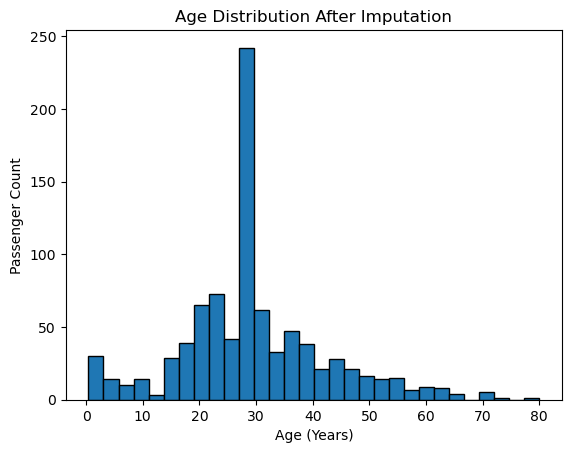

In [27]:
plt.hist(titanic_df['Age'], bins=30, edgecolor='black')
plt.title("Age Distribution After Imputation") # Updated title
plt.xlabel("Age (Years)") # More descriptive label
plt.ylabel("Passenger Count") # More descriptive label
plt.show()

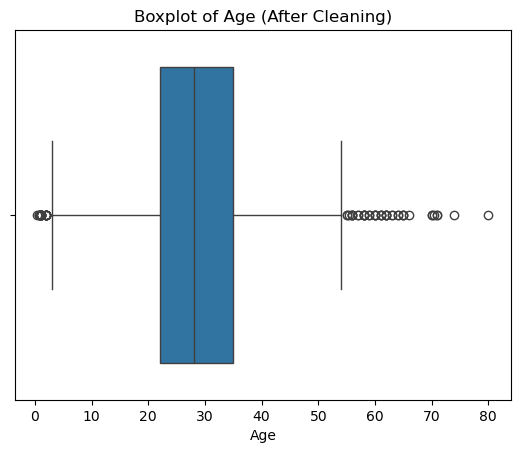

In [28]:
sns.boxplot(x=titanic_df['Age'])
plt.title("Boxplot of Age (After Cleaning)") # Updated title
plt.xlabel("Age")
plt.show()


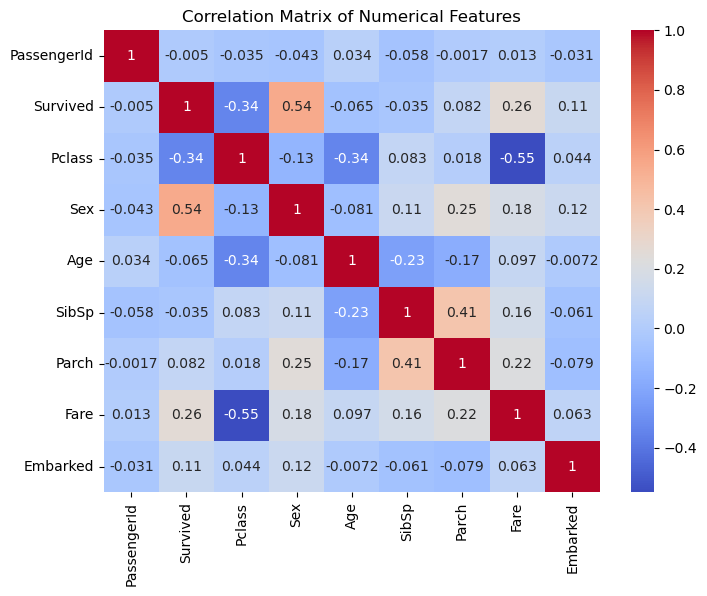

In [29]:
plt.figure(figsize=(8, 6)) # Making the figure a bit bigger so it's easier to read
sns.heatmap(titanic_df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of Numerical Features") # Updated title
plt.show()


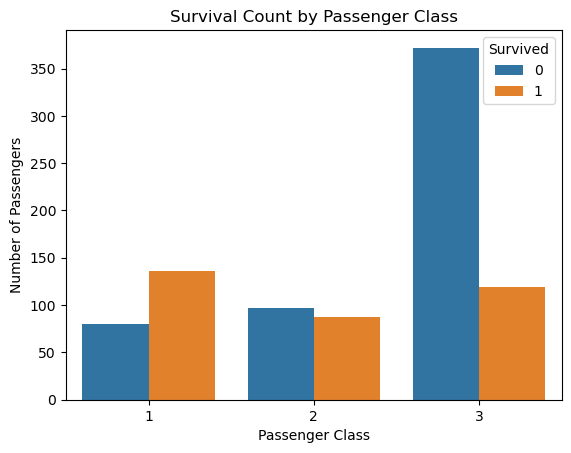

In [31]:
sns.countplot(x='Pclass', hue='Survived', data=titanic_df)
plt.title("Survival Count by Passenger Class") # More specific title
plt.xlabel("Passenger Class")
plt.ylabel("Number of Passengers")
plt.show()